In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando dataframe
# Colocando id como índice
cartoladf = pd.read_csv('C:/Users/SONY/PycharmProjects/cartola_tapajos/pontuacao.csv', sep=',', index_col=('id'))
cartoladf = cartoladf.sort_values('id')

In [3]:
# Corrigindo bug da API do cartola, que repete o último resultado na rodada seguinte
# Colocando dado como nulo

cartoladf.iloc[-1] = np.nan

In [4]:
# Apagando os dados nulos
cartoladf = cartoladf.dropna()
cartoladf

,big_blue,vermelho_luta,timbu_gold,maranhao_uchoa
id,,,,
1,50.149902,41.250000,55.060059,19.640015
2,59.649902,60.350098,48.850098,35.679932
3,66.899902,62.100098,51.959961,75.299805
4,38.350098,62.040039,37.540039,39.419922
5,34.389893,52.590088,49.439941,41.189941
6,57.729980,72.379883,89.540039,46.570068
7,56.790039,48.780029,57.750000,40.659912
8,67.000000,93.810059,65.109863,62.399902
9,54.620117,57.320068,71.609863,54.540039


# Estatísticas

## Verdes

**O verde é conquistado pelo vencedor da rodada**

In [5]:
# Verificando se o valor de cada linha é o maior com valores binários
verdesdf = cartoladf.eq(cartoladf.max(axis=1),axis=0).astype(int)
verdesdf

,big_blue,vermelho_luta,timbu_gold,maranhao_uchoa
id,,,,
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,0,0,1,0


In [6]:
# Somando os valores de cada coluna
verdes = verdesdf.sum()

[Text(0, 0, '4'), Text(0, 0, '10'), Text(0, 0, '9'), Text(0, 0, '4')]

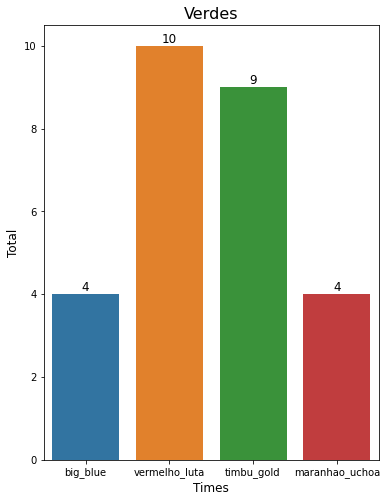

In [42]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=verdes.index,y=verdes.values)
plt.xlabel("Times", size=12)
plt.ylabel("Total", size=12)
plt.title('Verdes', size=16)
plt.bar_label(splot.containers[0],size=12)


## Vermelhos

**O jogador obtem o vermelho se tiver o pior desempenho na rodada**

In [8]:
# Verificando o menor valor por linha utilizando números binários
vermelhosdf = cartoladf.eq(cartoladf.min(axis=1),axis=0).astype(int)
vermelhosdf

,big_blue,vermelho_luta,timbu_gold,maranhao_uchoa
id,,,,
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [9]:
# Somando os valores
vermelhos = vermelhosdf.sum()

[Text(0, 0, '4'), Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '16')]

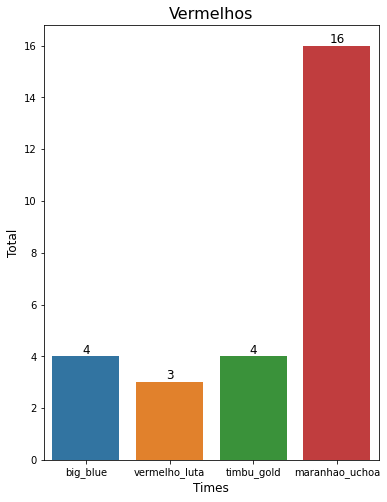

In [43]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=vermelhos.index,y=vermelhos.values)
plt.xlabel("Times", size=12)
plt.ylabel("Total", size=12)
plt.title('Vermelhos', size=16)
plt.bar_label(splot.containers[0],size=12)

In [11]:
# Verificando a quantidade de vermelhos caso o maranhao_uchoa não tivesse no campeonato
# Selecionando apenas as outras colunas

vermelhos_3 = cartoladf[['big_blue', 'vermelho_luta', 'timbu_gold']]
vermelhos_3 

,big_blue,vermelho_luta,timbu_gold
id,,,
1,50.149902,41.250000,55.060059
2,59.649902,60.350098,48.850098
3,66.899902,62.100098,51.959961
4,38.350098,62.040039,37.540039
5,34.389893,52.590088,49.439941
6,57.729980,72.379883,89.540039
7,56.790039,48.780029,57.750000
8,67.000000,93.810059,65.109863
9,54.620117,57.320068,71.609863


In [12]:
vermelhos_3 = vermelhos_3.eq(vermelhos_3.min(axis=1),axis=0).astype(int)
vermelhos_3

,big_blue,vermelho_luta,timbu_gold
id,,,
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
5,1,0,0
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [13]:
# Vermelhos sem maranhao_uchoa
ver3 = vermelhos_3.sum()

[Text(0, 0, '8'), Text(0, 0, '8'), Text(0, 0, '11')]

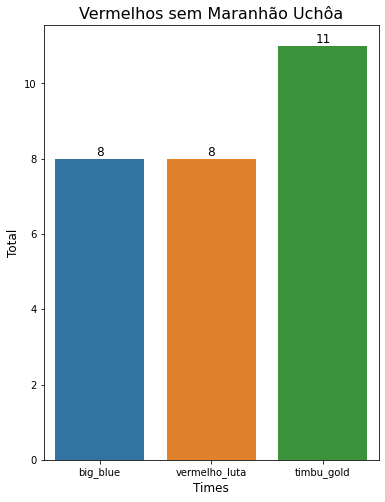

In [44]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=ver3.index,y=ver3.values)
plt.xlabel("Times", size=12)
plt.ylabel("Total", size=12)
plt.title('Vermelhos sem Maranhão Uchôa', size=16)

plt.bar_label(splot.containers[0],size=12)

# Outras Estatísticas

## Maior pontuação de cada time

In [15]:
# Maior Pontuação
cartoladf.max()

big_blue           86.000000
vermelho_luta     107.229980
timbu_gold         98.279785
maranhao_uchoa     81.259766
dtype: float64

## Menor pontuação de cada time

In [16]:
# Menor Pontuação
cartoladf.min()

big_blue          28.939941
vermelho_luta     13.010010
timbu_gold        26.609985
maranhao_uchoa    10.770020
dtype: float64

## Desempenho nas últimas 5 rodadas

In [17]:
cinco_ultimas = cartoladf.iloc[-5:].sum()

[Text(0, 0, '294.45'),
 Text(0, 0, '295.47'),
 Text(0, 0, '296.53'),
 Text(0, 0, '219.46')]

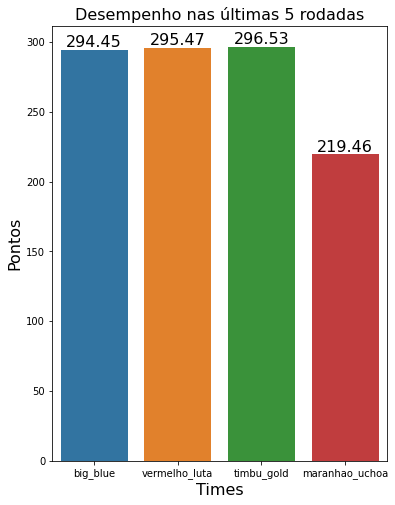

In [45]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=cinco_ultimas.index,y=cinco_ultimas.values)
plt.xlabel("Times", size=16)
plt.ylabel("Pontos", size=16)
plt.title('Desempenho nas últimas 5 rodadas', size=16)
plt.bar_label(splot.containers[0],size=16)


# Primeiro turno

### Pontuação geral

In [19]:
primeiro_turno = cartoladf.loc[1:19].sum()

[Text(0, 0, '1024.2'),
 Text(0, 0, '1119.48'),
 Text(0, 0, '1165.59'),
 Text(0, 0, '977.179')]

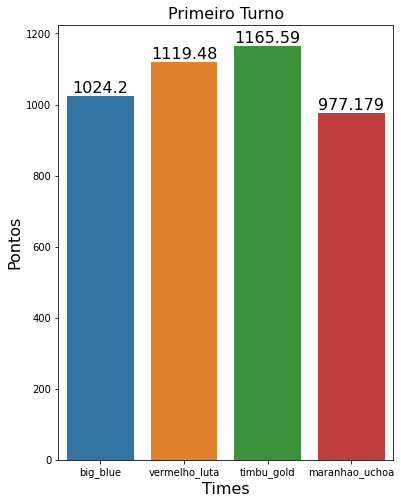

In [46]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=primeiro_turno.index,y=primeiro_turno.values)
plt.xlabel("Times", size=16)
plt.ylabel("Pontos", size=16)
plt.title('Primeiro Turno', size=16)

plt.bar_label(splot.containers[0],size=16)

### Verdes - Primeiro Turno

In [21]:
verdes_primeiro = verdesdf.loc[1:19].sum()

[Text(0, 0, '3'), Text(0, 0, '6'), Text(0, 0, '7'), Text(0, 0, '3')]

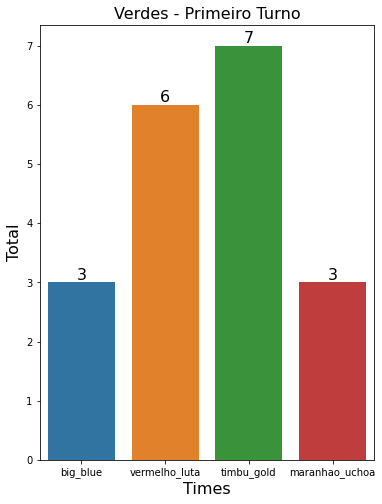

In [47]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=verdes_primeiro.index,y=verdes_primeiro.values)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Verdes - Primeiro Turno', size=16)
plt.bar_label(splot.containers[0],size=16)

### Vermelhos - Primeiro Turno

In [23]:
vermelhos_primeiro = vermelhosdf.loc[1:19].sum()

[Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '10')]

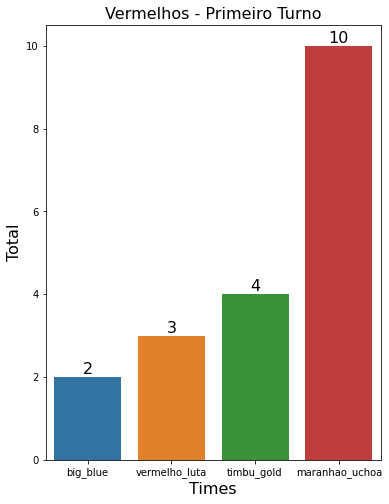

In [48]:
plt.figure(figsize=(6,8))
splot=sns.barplot(x=vermelhos_primeiro.index,y=vermelhos_primeiro)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Vermelhos - Primeiro Turno', size=16)
plt.bar_label(splot.containers[0],size=16)

# Comparando desempenho nas 8 primeiras rodadas de cada turno

In [25]:
oito_prim = cartoladf.loc[1:8].sum()

In [26]:
oito_seg = cartoladf.loc[20:27].sum()

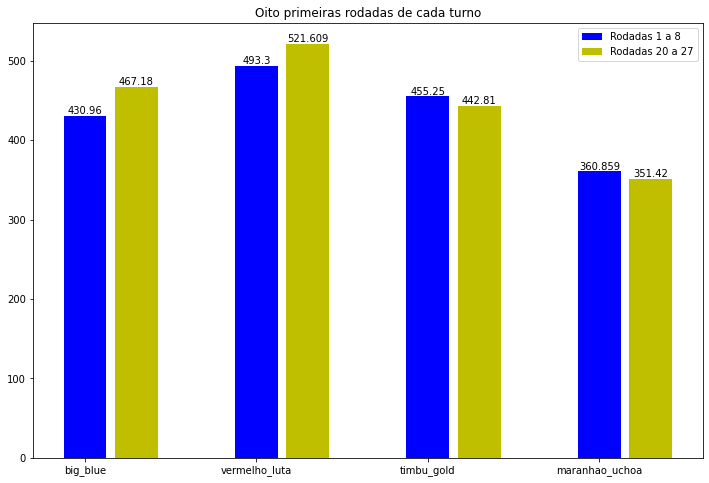

In [27]:
# Cria eixo x para objetos com uma separação de 0.25 entre as barras
x1 =  np.arange(len(oito_prim))
x2 = [x + 0.30 for x in x1]

plt.figure(figsize=(12,8))

# Plota as barras
plt.bar(oito_prim.index, oito_prim, width=0.25, label = 'Rodadas 1 a 8', color = 'b')
plt.bar(x2, oito_seg, width=0.25, label = 'Rodadas 20 a 27', color = 'y')


# Adicionando valores dentro do plot
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])


# insere uma legenda no gráfico
plt.legend()

plt.title("Oito primeiras rodadas de cada turno")

plt.show()


# Duelos

### Big Blue x Vermelho de Luta

In [28]:
big_x_ver = cartoladf[['big_blue', 'vermelho_luta']]
big_x_ver = big_x_ver.eq(big_x_ver.max(axis=1),axis=0).astype(int)
big_x_ver = big_x_ver.sum()

[Text(0, 0, '11'), Text(0, 0, '16')]

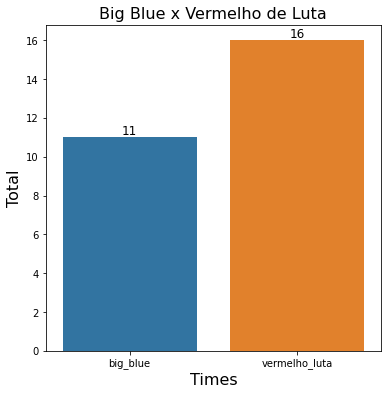

In [49]:
plt.figure(figsize=(6,6))
splot=sns.barplot(x=big_x_ver.index,y=big_x_ver)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Big Blue x Vermelho de Luta', size=16)
plt.bar_label(splot.containers[0],size=12)

### Big Blue x Timbu Gold

In [30]:
big_x_tg = cartoladf[['big_blue', 'timbu_gold']]
big_x_tg = big_x_tg.eq(big_x_tg.max(axis=1),axis=0).astype(int)
big_x_tg = big_x_tg.sum()

[Text(0, 0, '13'), Text(0, 0, '14')]

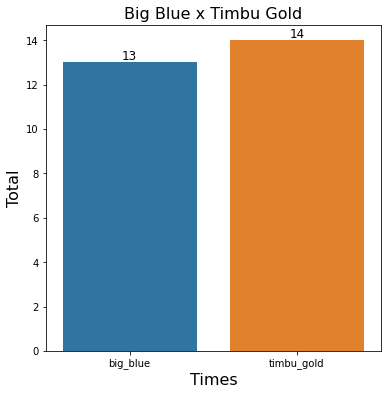

In [50]:
plt.figure(figsize=(6,6))
splot=sns.barplot(x=big_x_tg.index,y=big_x_tg)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Big Blue x Timbu Gold', size=16)
plt.bar_label(splot.containers[0],size=12)

### Big Blue x Maranhão Uchôa

In [32]:
big_x_mu = cartoladf[['big_blue', 'maranhao_uchoa']]
big_x_mu = big_x_mu.eq(big_x_mu.max(axis=1),axis=0).astype(int)
big_x_mu = big_x_mu.sum()

[Text(0, 0, '18'), Text(0, 0, '9')]

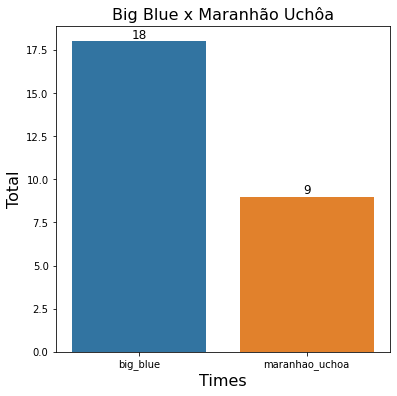

In [51]:
plt.figure(figsize=(6,6))
splot=sns.barplot(x=big_x_mu.index,y=big_x_mu)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Big Blue x Maranhão Uchôa', size=16)
plt.bar_label(splot.containers[0],size=12)

### Timbu Gold x Maranhão Uchoa

In [34]:
tg_x_mu = cartoladf[['timbu_gold', 'maranhao_uchoa']]
tg_x_mu = tg_x_mu.eq(tg_x_mu.max(axis=1),axis=0).astype(int)
tg_x_mu = tg_x_mu.sum()

[Text(0, 0, '19'), Text(0, 0, '8')]

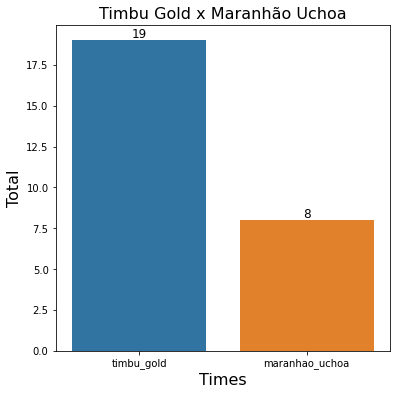

In [52]:
plt.figure(figsize=(6,6))
splot=sns.barplot(x=tg_x_mu.index,y=tg_x_mu)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Timbu Gold x Maranhão Uchoa', size=16)
plt.bar_label(splot.containers[0],size=12)

### Vermelho de Luta x Maranhão Uchôa

In [36]:
ver_x_mu = cartoladf[['vermelho_luta', 'maranhao_uchoa']]
ver_x_mu = ver_x_mu.eq(ver_x_mu.max(axis=1),axis=0).astype(int)
ver_x_mu = ver_x_mu.sum()

[Text(0, 0, '20'), Text(0, 0, '7')]

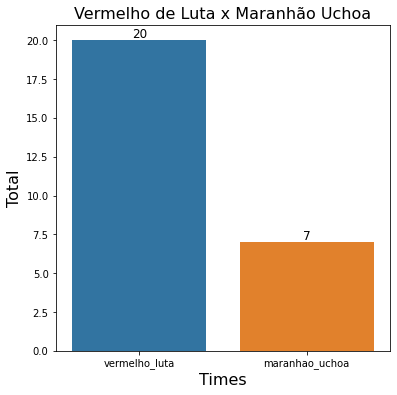

In [53]:
plt.figure(figsize=(6,6))
splot=sns.barplot(x=ver_x_mu.index,y=ver_x_mu)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Vermelho de Luta x Maranhão Uchoa', size=16)
plt.bar_label(splot.containers[0],size=12)

### Vermelho de Luta x Timbu Gold

In [38]:
ver_x_tg = cartoladf[['vermelho_luta', 'timbu_gold']]
ver_x_tg.eq(ver_x_tg.max(axis=1),axis=0).astype(int)


,vermelho_luta,timbu_gold
id,,
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,0,1


In [39]:
ver_x_tg = ver_x_tg.eq(ver_x_tg.max(axis=1),axis=0).astype(int)

In [40]:
ver_x_tg = ver_x_tg.sum()

[Text(0, 0, '14'), Text(0, 0, '13')]

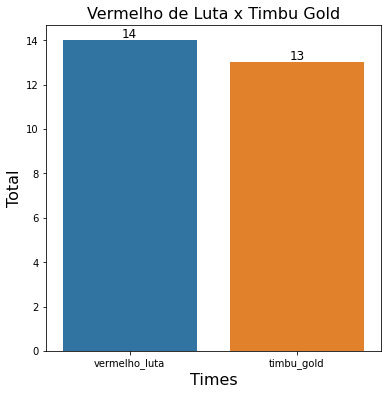

In [54]:
plt.figure(figsize=(6,6))
splot=sns.barplot(x=ver_x_tg.index,y=ver_x_tg)
plt.xlabel("Times", size=16)
plt.ylabel("Total", size=16)
plt.title('Vermelho de Luta x Timbu Gold', size=16)
plt.bar_label(splot.containers[0],size=12)